## 크몽 데이터를 활용한 데이터 전처리

< 이 노트북은 DsSchool에서 배운 데이터 분석을 복습한 내용입니다. >

크몽은 "비합리적인 서비스 시장을 정보기술로 혁신하여 새로운 일자리를 만들고 사람들이 행복하게 일하는 세상을 만든다."는 미션을 가지고 있는 프리랜서 마켓 플랫폼입니다. 크몽팀은 디자인, 마케팅, IT&개발, 컨텐츠 제작, 통번역 등 다양한 서비스 카테고리를 기반으로 직업과 직장의 경계를 허물며 사람들이 스스로 경제 주체가 되어 행복하게 일하는 세상을 만들고 있습니다.

크몽에서는 주어진 데이터를 활용하여 1) 사용자에게 새로운 상품을 추천하거나, 2) 오픈마켓에서 금기시되는 개인간 거래를 발견하 등 다양한 분야에서 데이터와 머신러닝 알고리즘을 사용합니다. 여기에는 크몽의 서비스에서 발생한 다양한 데이터를 사용하게 되는데, 이 부분에서 가장 중요한 것이 바로 데이터를 정리하는 과정, 일명 데이터 클리닝 수행하게 됩니다. 

* 목표 : 2 시간 안에 크몽 데이터를 전처리하기!

### Work Flow

``` < kmong-conversion 데이터> ```


1. User ID 컬럼 만들기


2. Datetime 데이터를 연/월/일/시/분/초 데이터 구분하여 컬럼 생성하기


3. 스마트폰 정보를 OS 와 버전으로 구분하기


4. 스마트폰 정보로 제조사 알아내기


5. 유입경로인 Channel 컬럼을 이용하여 구분하기


6. 사용자 활동을 저장하는 inappeventcategory 컬럼을 활동별로 구분하기


7. 필요하지 않은 컬럼 버리기


8. 컬럼명을 통일성 있게 고치기


9. 컬럼 정렬하기


``` < kmong-funne 데이터 > ```


1. 컬럼 정렬하기


2. 컬럼을 소문자로 통일하기


``` < kmong-category 데이터 > ```


1. 컬럼 명칭 바꾸기

## Data Loading

**kmong-conversion.csv**

메인 로그 데이터로  사용자가 크몽의 웹사이트/모바일 서비스에서 활동한 모든 활동 기록(activity)이 상세하게 담겨져 있으며, 이 정보를 바탕으로 데이터를 분석하여 사용자의 패턴을 유추할 수 있습니다. 

* ```eventcategory```: 앱의 이벤트에 대한 카테고리입니다. 크게 다음의 종류가 있습니다.
  - ```install```: 앱설치
  - ```launch```: 앱실행 
  - ```deeplinkLaunch```: 딥링크 통한 앱실행
  - ```goal```: 앱 내에서의 활동 여부
  - ```exit```: 앱 종료
  - ```foreground```, background```: 앱을 foreground, background로 전환
  - ```launchlnSession```: Session의 시작.
* ```isfirstactivity```: 해당 이벤트가 해당 유저에 한하여 첫 번째인지 혹은 두 번째 이상인지를 알려주는 값입니다. 
  - boolean 형식으로, 해당 이벤트가 해당 유저에 한하여 첫 번째 이벤트이면 True, 아니면 False를 갖습니다.
* ```apppackagename```: 앱의 패키지의 고유한 이름입니다. 안드로이드의 경우 applicationId을, iOS의 경우 Bundle ID를 가져오게 됩니다.
* ```appversion```: kmong 어플리케이션의 버전입니다.
* ```devicetype```: 사용자가 kmong app을 실행하고 있는 기기의 제품명입니다.
* ```devicemanufacturer```: 사용자가 kmong app을 실행하고 있는 기기의 제조회사입니다. 
* ```osversion```: 사용자가 kmong app을 실행하고 있는 기기의 os 버전입니다.
* ```canonicaldeviceuuid```: 사용자가 kmong app을 실행하고 있는 기기의 고유 식별자입니다. (사용자를 구분하는 식별자로 이용할 수 있습니다)
* ```sourcetype```: 해당 로그를 만든 고객이 유입된 경로입니다. 유료 광고 채널, 바이럴 채널, 앱 마켓 등으로 구분합니다.
* ```channel```: sourcetype과 동일하지만 조금 더 세분화되어 있습니다.
  - unattributed, WEB, google-play, m_naver, google, (not set), google.adwords, m_naverpowercontents, pc_naver, apple.searchads, facebook, m_daum
* ```params_campaign```: 마케터가 입력한 캠페인 파라미터 중 캠페인명입니다. 
* ```params_medium```: 마케터가 입력한 캠페인 파라미터 중 매체입니다.
* ```params_term```: 마케터가 입력한 캠페인 파라미터 중 키워드입니다.
* ```inappeventcategory```: 인앱이벤트 식별자값으로 인앱이벤트를 지칭하는 3개의 값(category > action > label) 중 가장 상위에 속하는 구분값입니다.
  - ```eventcategory```가 goal인 경우에만 제공됩니다.
  - 차후에 읽어올 funnel 데이터셋과 연결할 수 있습니다.
  - ex) seller_selling_history.view, gig_detail.view
* ```inappeventlabel```: categoryid와 동일합니다.
  - 차후에 읽어올 category 데이터셋과 연결할 수 있습니다.
  - 인앱이벤트를 지칭하는 3개의 값(category > action > label) 중 마지막에 속하는 구분값입니다.
* ```eventdatetime```: 모바일 클라이언트 상에서의 실제 이벤트 발생시간입니다. ISO 8601 표준에 따라서 제공됩니다. 
* ```isfirstgoalactivity```: goal 이벤트의 경우, 해당 Goal Label, Description, Key, Category를 가진 이벤트가 해당 유저에 한하여 첫 번째인지 혹은 두 번째 이상 인지를 알려주는 boolean 값입니다. 예를 들어 동일한 유저로부터 두 번 이상의 같은 Goal 이벤트가 발생한 경우(e.g. 동일한 물건 재구매 등) 이 값은 false가 됩니다.

* ```event_rank```: 데이터를 정렬하는데 필요한 컬럼입니다. log엔 기록되지 않으며, DS_School에서 제공하는 전처리된 컬럼입니다.

In [1]:
import pandas as pd
import numpy as np

# Set maximum columns
pd.options.display.max_columns = 100

# Importing dataset
raw_log = pd.read_csv("kmong-conversion.csv")

print(raw_log.shape)
raw_log.head()

(434244, 19)


,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,canonicaldeviceuuid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28T00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28T00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28T00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,168761CB-CB67-4592-867D-52780D651297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28T00:00:01+09:00,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,NaN,True
4,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,viral,WEB,NaN,NaN,NaN,buyer_order_track.view,NaN,2018-09-28T00:00:02+09:00,236e9946-7801-4898-b609-06c8ab1139dc,False,True


**kmong-funnel.csv**

퍼널(Funnel) 데이터는 사용자가 서비스에 접속한 뒤 상품을 구매하기까지의 모든 경로를 구조화 한 것을 의미합니다. 사용자가 특정 상품을 결제하기 위해선, 해당 상품의 설명을 적은 페이지를 방문해야 하며, 상품 설명 페이지를 방문하기 위해서는 해당 상품이 리스트되어있는 페이지를 방문해야 합니다. 이런 방식으로 웹사이트를 설명하는 것을 일명 퍼널이라고 합니다.

<img src="https://cdn-images-1.medium.com/max/1600/0*voRGTKciwKuIb2HS.png" width=480 />

<br />
<center><small>사용자가 처음 유입(Acquistion) 되었을 때부터 구매(Revenue)를 할 때 까지의 모든 과정을 깔때기로 묘사한 것을 퍼널이라고 합니다.
<br />    

이 퍼널 정보를 이용해 사용자가 상품을 구매하는 전환(Conversion) 여부, 내지는 서비스를 이탈하는 이탈(Churn) 여부를 추적할 수 있으며, 이를 통해서 웹사이트나 모바일서비스를 개선하여 전환율을 높이고 이탈률을 낮출 수 있습니다.

In [2]:
# Import funner dataset
raw_funnel = pd.read_csv("kmong-funnel.csv")

print(raw_funnel.shape)
raw_funnel.head()

(53, 6)


,Lv2,viewid,viewid desc,Lv1,funnel name,funnel desc
0,1100,home,홈 (탭),11,home,홈
1,1210,category_list,카테고리 목록 (탭),12,category,카테고리
2,1200,category_gig,카테고리-상품목록,12,category,카테고리
3,1300,search,검색,13,search,검색
4,1301,search_gig,검색-상품목록,13,search,검색


**kmong-category.csv**

마지막으로 가져올 데이터셋은 크몽에서 판매하는 상품의 카테고리를 나타내는 ```kmong-category.csv``` 입니다. 크몽에서는 디자인, 번역, 컨텐츠 제작등 다양한 상품을 판매하고 있는데, 이 상품을 그룹화하고 정리할 수 있도록 만든 것이 카테고리입니다.

In [3]:
# Import category dataset
raw_category = pd.read_csv("kmong-category.csv")

print(raw_category.shape)
raw_category.head()

(245, 9)


,depth,categoryid,categoryname,cat1_id,cat2_id,cat3_id,cat1,cat2,cat3
0,1,1,디자인,1,NaN,NaN,디자인,NaN,NaN
1,1,2,마케팅,2,NaN,NaN,마케팅,NaN,NaN
2,1,3,번역·통역,3,NaN,NaN,번역·통역,NaN,NaN
3,1,4,문서작성,4,NaN,NaN,문서작성,NaN,NaN
4,1,6,IT·프로그래밍,6,NaN,NaN,IT·프로그래밍,NaN,NaN


## Data Cleaning

**1. ```canonicaldeviceuuid``` 컬럼명을 ```userid``` 컬럼명으로 바꿔기.**

먼저 ```canonicaldeviceuuid```라는 컬럼명을 변경합니다. 이 컬럼은 크몽을 이용하는 한 명의 사용자를 나타내는 중요한 정보임에는 틀림없지만, ```canonicaldeviceuuid```라는 표현 자체가 크몽, 내지는 다른 몇몇 분야에서만 쓰이는 표현이기 때문에 이 데이터를 처음 보는 사람의 입장에서는 직관적으로 이해하기 힘듭니다. 그렇기 때문에 이 컬럼의 이름을 많은 사람들이 직관적으로 이해할 수 있는 ```userid```로 바꾸고 싶습니다.

In [4]:
# Change column name
raw_log["userid"] = raw_log['canonicaldeviceuuid']

raw_log[["canonicaldeviceuuid", "userid"]].head()

,canonicaldeviceuuid,userid
0,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957
1,8a871e50-0717-4aed-9bad-04ac3c3793be,8a871e50-0717-4aed-9bad-04ac3c3793be
2,A9E5778A-8F3D-4597-9718-74BF953A9F64,A9E5778A-8F3D-4597-9718-74BF953A9F64
3,168761CB-CB67-4592-867D-52780D651297,168761CB-CB67-4592-867D-52780D651297
4,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D


**2. ```eventdatetime``` 컬럼은 datetime 형태로 바꾼 뒤 연/월/일/시/분/초 데이터를 추출하기.**

```eventdatetime```은 날짜와 시간 형식으로 표현되어 있습니다. (ex: 2018-01-01T00:00:00+09:00) 하지만 이 데이터를 처음 읽을 때, 판다스는 날짜 데이터로 인식하지 않고 문자열(object, 내지는 string)으로 인식합니다. 이 데이터를 날짜와 시간 형식을 나타내는 ```datetime``` 형태로 바꾼 뒤, 연/월/일/시/분/초 데이터를 추출합니다.

In [5]:
# Extract month, day, hour, minute, second from eventdatetime
raw_log["eventdatetime"] = pd.to_datetime(raw_log["eventdatetime"])

raw_log["eventdatetime_year"] = raw_log["eventdatetime"].dt.year
raw_log["eventdatetime_month"] = raw_log["eventdatetime"].dt.month
raw_log["eventdatetime_day"] = raw_log["eventdatetime"].dt.day
raw_log["eventdatetime_hour"] = raw_log["eventdatetime"].dt.hour
raw_log["eventdatetime_minute"] = raw_log["eventdatetime"].dt.minute
raw_log["eventdatetime_second"] = raw_log["eventdatetime"].dt.second
raw_log["eventdatetime_dayofweek"] = raw_log["eventdatetime"].dt.dayofweek

print(raw_log.shape)
raw_log[["eventdatetime", "eventdatetime_year", "eventdatetime_month", "eventdatetime_day", "eventdatetime_hour", "eventdatetime_minute", "eventdatetime_second", "eventdatetime_dayofweek"]].head()

(434244, 27)


,eventdatetime,eventdatetime_year,eventdatetime_month,eventdatetime_day,eventdatetime_hour,eventdatetime_minute,eventdatetime_second,eventdatetime_dayofweek
0,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,4
1,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,4
2,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,4
3,2018-09-28 00:00:01+09:00,2018,9,28,0,0,1,4
4,2018-09-28 00:00:02+09:00,2018,9,28,0,0,2,4


**3. ```osversion``` 컬럼에 들어가 있는 정보를 운영체제와 버전별로 나누기.**

```osversion``` 컬럼을 사용자가 현재 사용하고 있는 스마트폰 디바이스의 운영체제와 그 버전을 나타냅니다. 여기에는 크게 1) 현재 사용하고 있는 운영체제(Operating System, 이하 OS), 2) 그리고 해당 운영체제의 버전(version) 정보가 기록되어 있습니다. 가령 ```osversion```에 들어있는 값이 iOS11.4.1이라면, 이 스마트폰의 운영체제는 iOS(아이폰), 운영체제의 버전은 11.4.1 이라는 사실을 알 수 있습니다.

이 데이터를 차후 데이터 분석용으로 다루기 쉽게, ```ostype(clean)```과 ```osversion(clean)```이라는 두 개의 컬럼으로 분리하고 싶습니다. 

  * ```osversion``` 컬럼값이 iOS11.4.1이라면, 새로운 컬럼인 ```ostype(clean)```에는 iOS가, ```osversion(clean)```에는 11.4.1이 들어가야 합니다.
  * ```osversion``` 컬럼값이 Android7.0이라면, 새로운 컬럼인 ```ostype(clean)```에는 Android가, ```osversion(clean)```에는 7.0이 들어가야 합니다.

In [6]:
# Create function to find OS type 
def find_OsType(osversion):
    if "iOS" in osversion:
        return "iOS"
    else:
        return "Android"
# Create function to find OS version
def find_OsVersion(osversion):
    return osversion.replace("iOS", "").replace("Android", "")

raw_log["ostype(clean)"] = raw_log["osversion"].apply(find_OsType)
raw_log["osversion(clean)"] = raw_log["osversion"].apply(find_OsVersion)

print(raw_log.shape)

raw_log[["osversion", "ostype(clean)", "osversion(clean)"]].head()

(434244, 29)


,osversion,ostype(clean),osversion(clean)
0,iOS11.4.1,iOS,11.4.1
1,Android7.0,Android,7.0
2,iOS12.0,iOS,12.0
3,iOS11.4.1,iOS,11.4.1
4,iOS11.4.1,iOS,11.4.1


**4. ```devicemanufacturer``` 컬럼 정보를  제조사별로 구별하기.**

```devicemanufacturer``` 컬럼은 사용자가 현재 사용하고 있는 스마트폰 디바이스를 제조한 제조사의 정보가 들어가 있습니다. 가령 ```samsung```이라고 적혀있으면 이 스마트폰은 삼성전자가 제조했다고 볼 수 있고, ```LG Electronics```라고 적혀있으면 이 스마트폰은 LG전자가 제조했다고 볼 수 있습니다. 

하지만 ```devicemanufacturer``` 컬럼에는 이 외에도 샤오미(Xiaomi), 폭스콘(Foxconn), 팬텍(PANTECH), 화웨이(HUAWEI)와 같은 마이너한 제조사 정보도 들어가 있습니다. 이 제조사들은 전체 사용자의 2%도 되지 않기 때문에, 이 데이터를 무시하거나 하나의 값(ex: Others)으로 통일해주면 데이터 분석가가 더 효율적으로 데이터를 분석할 수 있을 것 같습니다.

그러므로 ```devicemanufacturer``` 컬럼의 값을 정리해보겠습니다. 정리 방식은 다음과 같습니다.

 * ```samsung```이라고 적혀있는 값은 앞 글자를 대문자로 바꿉니다. (=```Samsung```)
 * ```LGE```와 ```LG Electronics```라는 값은 ```LG```로 통일합니다.
 * ```Apple```, ```Samsung```, ```LG```를 제외한 나머지는 ```Other```로 묶습니다.

In [7]:
# Write your code here!
def find_deviceManu(device):
    if "samsung" in device:
        return "Samsung"
    elif "LG" in device:
        return "LG"
    elif "Apple" in device:
        return "Apple"
    else:
        return "Others"
    
raw_log["devicemanufacturer(clean)"]  = raw_log["devicemanufacturer"].apply(find_deviceManu)
raw_log.head(3)

,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,canonicaldeviceuuid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank,userid,eventdatetime_year,eventdatetime_month,eventdatetime_day,eventdatetime_hour,eventdatetime_minute,eventdatetime_second,eventdatetime_dayofweek,ostype(clean),osversion(clean),devicemanufacturer(clean)
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28 00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018,9,28,0,0,0,4,iOS,11.4.1,Apple
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28 00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True,8a871e50-0717-4aed-9bad-04ac3c3793be,2018,9,28,0,0,0,4,Android,7.0,Samsung
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28 00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018,9,28,0,0,0,4,iOS,12.0,Apple


**5. ```channel``` 컬럼 정보를 정리하기.**

```channel``` 컬럼을 사용자가 크몽 서비스에 유입된 경로를 기록한 정보입니다. 여기에는 웹(WEB), 구글(ex: google-play, google, google.adwords, etc), 네이버(ex: m_naver, m_naverpowercontents, pc_naver)등이 기록되어 있습니다. 이 정보도 마찬가지로 데이터를 분석하기 어렵게 산재되어 있기 때문에, 깔끔하게 정리해주고 싶습니다. 정리 방식은 다음과 같습니다.

  * 컬럼값에 google이라고 들어간 값(ex: google-play, google.adwords, etc)은 전부 google로 통일합니다.
  * 컬럼값에 daum이라고 들어간 값(ex: m_daum, etc)은 전부 daum으로 통일합니다.
  * 컬럼값이 naver라고 들어간 값(ex: m_naver, pc_naver, m_naverpowercontents, etc)은 전부 naver로 통일합니다.
  * 컬럼값에 apple이라고 들어간 값(ex: apple.searchads, etc)은 전부 apple로 통일합니다.
  * 컬럼값에 WEB이라고 들어간 값(ex: WEB)은 전부 web으로 통일합니다.

여기서 ```channel``` 값에 빈 값(NaN, Not a Number)가 있다는 걸 주의하세요. 이 값은 소수점(float)으로 간주하기 때문에, 문자열에서 쓰이는 기능을 지원하지 않습니다. 

In [8]:
#  Cleaning channel column
def clean_channel(channel):
    if pd.isnull(channel):
        return np.nan
    
    if "google" in channel:
        return "google"
    elif "naver" in channel:
        return "naver"
    elif "daum" in channel:
        return "daum"
    elif "apple" in channel:
        return "apple"
    elif "WEB" in channel:
        return "web"
    else:
        return channel

# Apply function to dataset
raw_log["channel(clean)"] = raw_log["channel"].apply(clean_channel)
raw_log.head(3)

,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,canonicaldeviceuuid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank,userid,eventdatetime_year,eventdatetime_month,eventdatetime_day,eventdatetime_hour,eventdatetime_minute,eventdatetime_second,eventdatetime_dayofweek,ostype(clean),osversion(clean),devicemanufacturer(clean),channel(clean)
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28 00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018,9,28,0,0,0,4,iOS,11.4.1,Apple,unattributed
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28 00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True,8a871e50-0717-4aed-9bad-04ac3c3793be,2018,9,28,0,0,0,4,Android,7.0,Samsung,unattributed
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28 00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018,9,28,0,0,0,4,iOS,12.0,Apple,unattributed


**6. ```inappeventcategory``` 컬럼에 들어가 있는 정보를 활동별로 컬럼 나누기.**

```inappeventcategory```에는 사용자 액티비티를 나타내는 정보가 들어있습니다. 크몽에 방문한 고객이 상품 페이지를 보고 있는지, 구매를 진행중인지 등에 대한 정보가 이 컬럼에 담겨있다고 보시면 됩니다. 또한 ```inappeventcategory```에 있는 정보는 차후 퍼널(funnel) 데이터를 합치는데 사용되기도 합니다. 

  * ```viewcategory``` - ```inappeventcategory```에서 언더바(_)를 기준으로 왼쪽 텍스트만 가져옵니다. 언더바가 없을 경우 점(.)의 왼쪽 텍스트만 가져옵니다.
  * ```viewid``` - ```inappeventcategory```에서 점(.)의 왼쪽 텍스트만 가져옵니다.
  * ```viewaction``` - ```inappeventcategory```에서 점(.)의 오른쪽 텍스트만 가져옵니다.

In [9]:
# Create split_viewcat function
def split_viewcat(category):
    if pd.isnull(category):
        return np.nan    
    elif "_" in category:
        temp = category.split('_')
        return temp[0]
    else:
        temp = category.split('.')
        return temp[0]
        
# Create split_viewid function
def split_viewid(category):
    if pd.isnull(category):
        return np.nan
    else:
        temp = category.split('.')
        return temp[0]
    
# Create split_viewaction function
def split_viewaction(category):
    if pd.isnull(category):
        return np.nan
    else:
        temp = category.split('.')
        return temp[-1]
    
# Apply split functions    
raw_log["viewcategory"] = raw_log["inappeventcategory"].apply(split_viewcat)
raw_log["viewid"] = raw_log["inappeventcategory"].apply(split_viewid) 
raw_log["viewaction"] = raw_log["inappeventcategory"].apply(split_viewaction) 

print(raw_log.shape)
raw_log.head(3)

(434244, 34)


,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,canonicaldeviceuuid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank,userid,eventdatetime_year,eventdatetime_month,eventdatetime_day,eventdatetime_hour,eventdatetime_minute,eventdatetime_second,eventdatetime_dayofweek,ostype(clean),osversion(clean),devicemanufacturer(clean),channel(clean),viewcategory,viewid,viewaction
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28 00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018,9,28,0,0,0,4,iOS,11.4.1,Apple,unattributed,home,home,view
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28 00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True,8a871e50-0717-4aed-9bad-04ac3c3793be,2018,9,28,0,0,0,4,Android,7.0,Samsung,unattributed,gig,gig_detail,view
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28 00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018,9,28,0,0,0,4,iOS,12.0,Apple,unattributed,inbox,inbox_detail,view


**7. 필요하지 않은 컬럼을 버리기.**

필요하지 않은 컬럼을 버리고, 기존 컬럼의 이름을 직관적으로 수정하게 됩니다. 

* ```osversion``` - 이제 이 컬럼을 버린 뒤 ```osversion(clean)```을 사용할 것입니다.
* ```devicemanufacturer``` - 이제 이 컬럼을 버린 뒤 ```devicemanufacturer(clean)```을 사용할 것입니다.
* ```canonicaldeviceuuid``` - 이제 이 컬럼을 버린 뒤 ```userid```를 사용할 것입니다.
* ```channel``` - 이제 이 컬럼을 버린 뒤 ```channel(clean)```을 사용할 것입니다.
* ```event_rank``` - 이 컬럼은 애초부터 사용할 필요가 없기 때문에 제거해줘도 됩니다.

In [10]:
# Drop columns
raw_log = raw_log.drop(columns= [ "osversion", "devicemanufacturer","canonicaldeviceuuid", "channel", "event_rank"])

**8. 이름을 통일성있게 변경하기.**

데이터를 분석할 때 컬럼명의 형식을 동일하게 유지하는 것이 중요합니다. 가령 회사 내부 데이터 팀에서 컬럼에서 두 개의 단어를 하이픈(-)으로 연결하기로 합의했다면 모든 컬럼을 하이픈으로 연결해야 하고, 언더바(_)로 연결하기로 합의했다면 모든 컬럼을 언더바로 연결해야 합니다.

하지만 아쉽게도, 현재 데이터의 컬럼명에는 이런 통일성이 잘 갖춰져 있는 것 같습니다. (ex: ```eventcategory``` vs ```params_term```) 그러므로 데이터의 컬럼명을 작성하는 형식을 하나로 통일하도록 하겠습니다. 

  * 단어와 단어 사이는 언제나 언더바(_)로 구분합니다. 가령 하이픈(-)으로 구분하거나, 띄어쓰기를 사용하면 안 됩니다. (ex: event_category는 허용하지만, eventcategory나 event-category, 또는 event category는 허용하지 않습니다)
  * 컬럼명에 (clean)이라고 들어간 표현은 이제는 지워줘도 될 것 같습니다. (ex channel(clean) -> channel)

In [12]:

# Rename columns
raw_log = (raw_log.rename(columns={
    "eventcategory" : "event_category",
    "isfirstactivity" : "is_first_activity",
    "apppackagename" : "app_package_name",
    "appversion":"app_version",
    "devicetype":"device_type",
    "sourcetype":"source_type",
    "inappeventcategory":"in_app_event_category",
    "inappeventlabel":"in_app_event_label",
    "eventdatetime":"event_datetime",
    "rowuuid":"row_uuid",
    "isfirstgoalactivity":"is_first_goal_activity",
    "ostype(clean)":"os_type",
    "osversion(clean)":"os_version",
    "devicemanufacturer(clean)":"device_manufacturer",
    "userid":"user_id",
    "channel(clean)":"channel",
    "eventdatetime_year":"event_datetime_year",
    "eventdatetime_month":"event_datetime_month",
    "eventdatetime_day":"event_datetime_day",
    "eventdatetime_hour":"event_datetime_hour",
    "eventdatetime_minute":"event_datetime_minute",
    "eventdatetime_second":"event_datetime_second",
    "viewid":"view_id",
    "viewaction":"view_action",
    "viewcategory":"view_category"
}))

raw_log.head(3)

,event_category,is_first_activity,app_package_name,app_version,device_type,source_type,params_campaign,params_medium,params_term,in_app_event_category,in_app_event_label,event_datetime,row_uuid,is_first_goal_activity,user_id,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,eventdatetime_dayofweek,os_type,os_version,device_manufacturer,channel,view_category,view_id,view_action
0,goal,False,com.kmong.iOS,4.0.4,iPhone,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28 00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018,9,28,0,0,0,4,iOS,11.4.1,Apple,unattributed,home,home,view
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28 00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,8a871e50-0717-4aed-9bad-04ac3c3793be,2018,9,28,0,0,0,4,Android,7.0,Samsung,unattributed,gig,gig_detail,view
2,goal,False,com.kmong.iOS,4.0.4,iPhone,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28 00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018,9,28,0,0,0,4,iOS,12.0,Apple,unattributed,inbox,inbox_detail,view


**9. 마지막으로 컬럼을 정렬하기.**

마지막은 컬럼을 용도에 맞게 잘 정렬해주면 될 것 같습니다. 정렬할 때는 보통 1) 중요한 컬럼을 좌측으로, 상대적으로 중요하지 않은 컬럼을 우측으로 옮겨주고, 2) 비슷한 역할을 하는 컬럼이나 서로간에 연관되어있는 컬럼은 같은 위치로 묶어줍니다.

In [13]:
new_order = ["row_uuid","app_package_name","user_id","event_datetime","event_datetime_year","event_datetime_month","event_datetime_day","event_datetime_hour","event_datetime_minute","event_datetime_second","device_manufacturer","device_type","os_type","os_version","app_version","event_category","view_category","view_id","view_action","in_app_event_category","in_app_event_label","source_type","channel","params_campaign","params_medium","params_term","is_first_activity","is_first_goal_activity"]
raw_log = raw_log[new_order]
raw_log.head(3)

,row_uuid,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,device_manufacturer,device_type,os_type,os_version,app_version,event_category,view_category,view_id,view_action,in_app_event_category,in_app_event_label,source_type,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity
0,fd2a188c-bc9b-4702-9c47-b546b2614817,com.kmong.iOS,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Apple,iPhone,iOS,11.4.1,4.0.4,goal,home,home,view,home.view,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
1,e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,gig_detail.view,41201.0,unattributed,unattributed,NaN,NaN,NaN,False,False
2,14eb3197-db83-493a-b7be-83582960c40b,com.kmong.iOS,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Apple,iPhone,iOS,12.0,4.0.4,goal,inbox,inbox_detail,view,inbox_detail.view,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False


**10. funnel 데이터를 정리하기.**

퍼널 데이터에는 크몽 서비스에서 사용하는 퍼널에 대한 부연 설명을 담고 있습니다. 이 데이터는 잘 정리되어 있기 때문에, 별도로 처리해줘야 하는 건 많지 않습니다.

  1. 먼저 컬럼을 ```Lv1```, ```Lv2```, ```viewid```, ```viewid desc```, ```funnel name```, ```funnel desc``` 순으로 정렬해주세요.
  2. 그 다음 모든 컬럼을 소문자로 통일하고(ex: Lv1 -> lv1), 띄어쓰기를 언더바(_)로 바꿔주세요. (ex: funnel name -> funnel_name)

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>lv1</th>
            <th>lv2</th>
            <th>view_id</th>
            <th>view_desc</th>
            <th>funnel_name</th>
            <th>funnel_desc</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>11</td>
            <td>1100</td>
            <td>home</td>
            <td>홈 (탭)</td>
            <td>home</td>
            <td>홈</td>
        </tr>
        <tr>
            <th>1</th>
            <td>12</td>
            <td>1210</td>
            <td>category_list</td>
            <td>카테고리 목록 (탭)</td>
            <td>category</td>
            <td>카테고리</td>
        </tr>
        <tr>
            <th>2</th>
            <td>12</td>
            <td>1200</td>
            <td>category_gig</td>
            <td>카테고리-상품목록</td>
            <td>category</td>
            <td>카테고리</td>
        </tr>
        <tr>
            <th>3</th>
            <td>13</td>
            <td>1300</td>
            <td>search</td>
            <td>검색</td>
            <td>search</td>
            <td>검색</td>
        </tr>
        <tr>
            <th>4</th>
            <td>13</td>
            <td>1301</td>
            <td>search_gig</td>
            <td>검색-상품목록</td>
            <td>search</td>
            <td>검색</td>
        </tr>
    </tbody>
</table>

In [14]:
# Rearrange columns
new_order = ["Lv1","Lv2","viewid","viewid desc","funnel name", "funnel desc"]
raw_funnel = raw_funnel[new_order]

# Modify column names
raw_funnel = (raw_funnel.rename(columns={
    "Lv1":"lv1",
    "Lv2":"lv2",
    "viewid":"view_id",
    "viewid desc":"view_desc",
    "funnel name":"funnel_name",
    "funnel desc":"funnel_desc"
}))

raw_funnel.head(3)

,lv1,lv2,view_id,view_desc,funnel_name,funnel_desc
0,11,1100,home,홈 (탭),home,홈
1,12,1210,category_list,카테고리 목록 (탭),category,카테고리
2,12,1200,category_gig,카테고리-상품목록,category,카테고리


**11. category 데이터를 정리하기.**

category 데이터는크몽에서 판매하는 상품의 카테고리를 나타내는 정보인데, 퍼널 데이터와 마찬가지로 이 데이터로 잘 정리되어 있기 때문에 크게 건드려줘야 하는 부분은 없고, 컬럼명만 바꾸어 줍니다.

* 단어 사이에는 언더바(```_```)를 붙입니다. (ex: categoryid -> category_id)
* 축약어는 전체 단어로 풀어서 작성합니다. (ex: cat1 -> category1)

In [15]:
# Rename columns
raw_category = (raw_category.rename(columns={
    "categoryid":"category_id",
    "categoryname":"category_name",
    "cat1_id":"category1_id",
    "cat2_id":"category2_id",
    "cat3_id":"category3_id",
    "cat1":"category1",
    "cat2":"category2",
    "cat3":"category3"
}))

raw_category.head(3)

,depth,category_id,category_name,category1_id,category2_id,category3_id,category1,category2,category3
0,1,1,디자인,1,NaN,NaN,디자인,NaN,NaN
1,1,2,마케팅,2,NaN,NaN,마케팅,NaN,NaN
2,1,3,번역·통역,3,NaN,NaN,번역·통역,NaN,NaN


## Merge

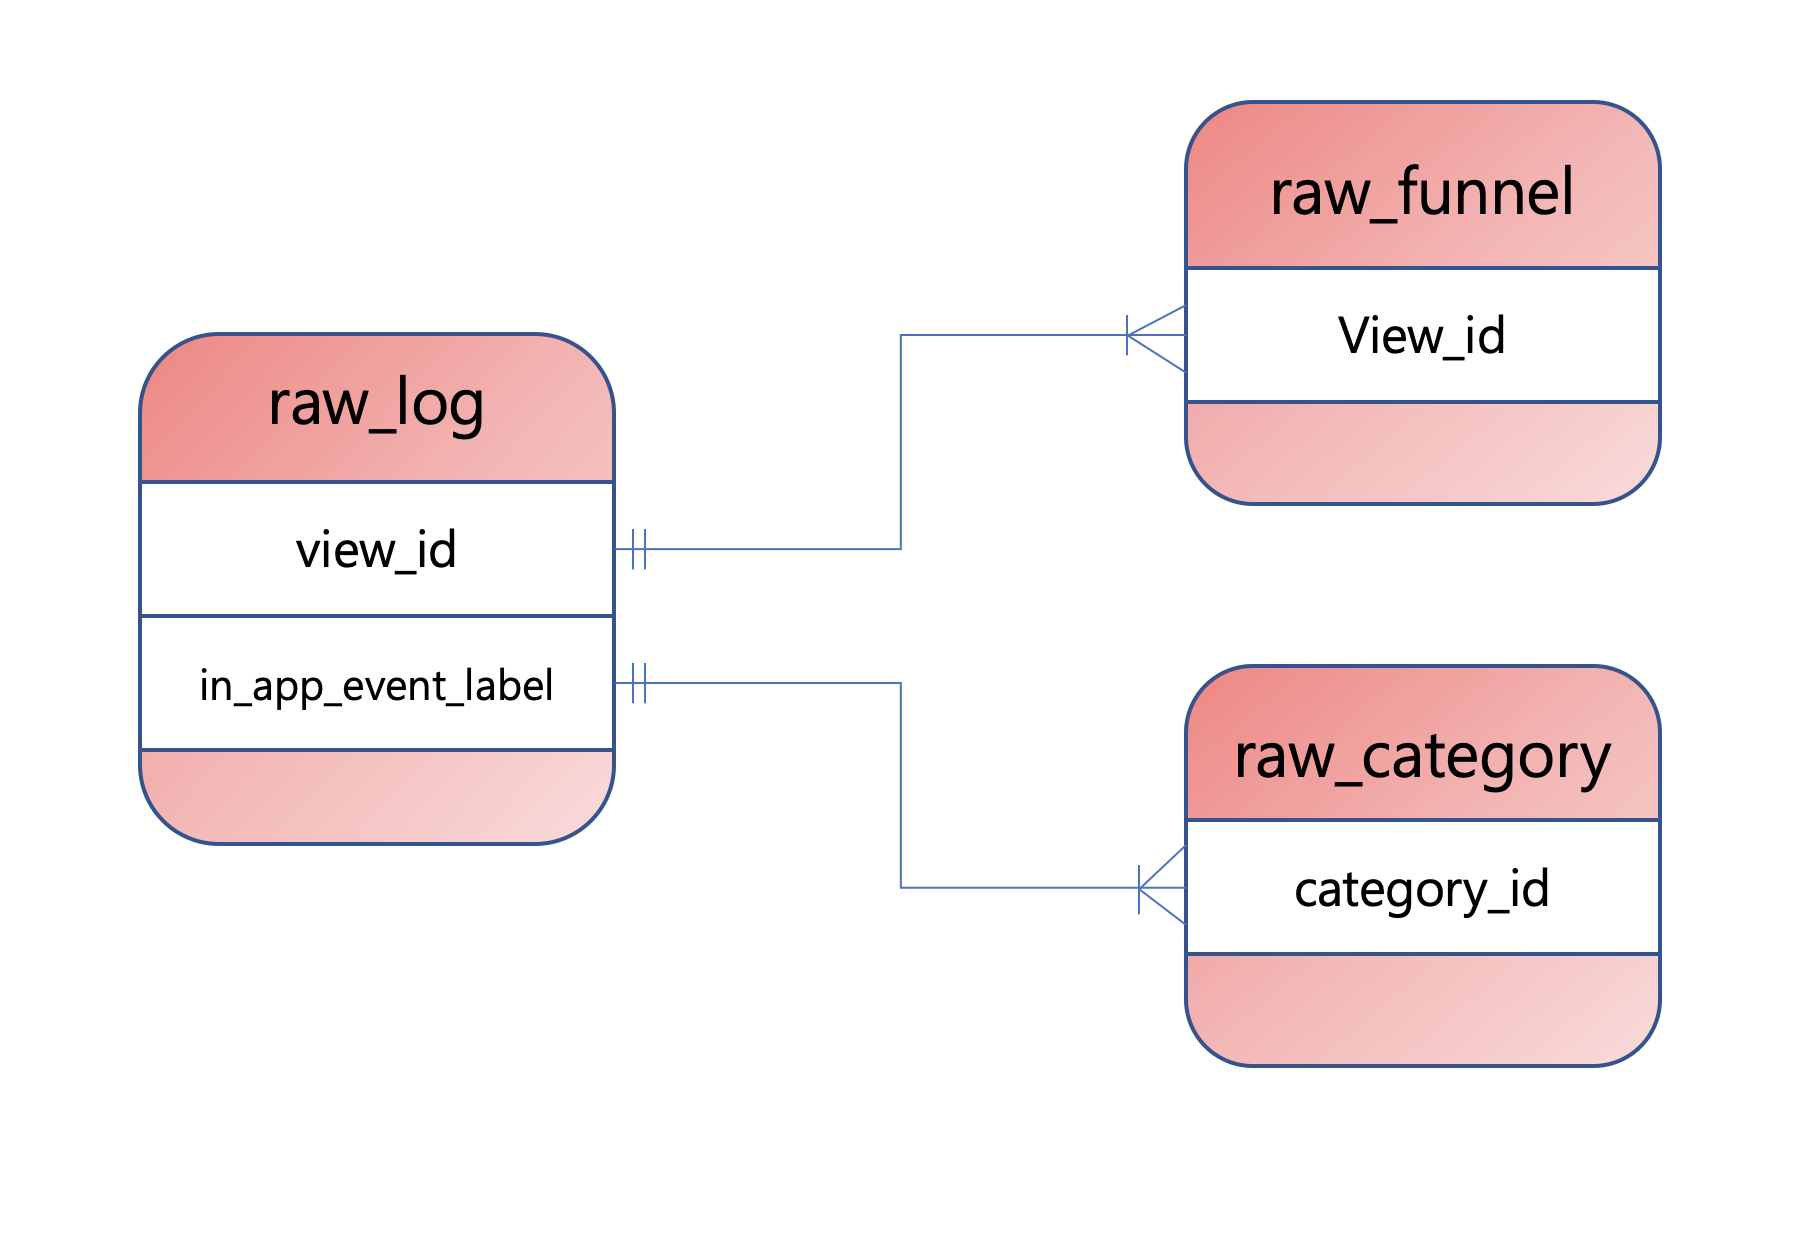

In [18]:
Image(filename='merge.png', width=500)

**12. ```log``` 데이터의 view_id 컬럼과 ```funnel``` 데이터의 view_id 컬럼을 활용하여 두 개의 데이터를 합치기**

```log``` 데이터에 사용자의 액티비티가 모두 모여져있고, 여기에서 가장 중요한 정보 중 하나인 퍼널(funnel)에 대한 부연 설명이 ```funnel``` 데이터에 모여 있습니다. 그러므로 이 두개를 합친다면, 차후에 ```log```데이터에서 퍼널 분석을 할 때 다른 데이터 분석가들이 더 직관적으로 데이터를 이해할 수 있을 것 같습니다.

두 개의 데이터를 합치기 위해  연관이 있는 컬럼은 ```view_id```라는 이름의 컬럼이며, 데이터를 합칠 때는 [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)라는 함수를 사용합니다. 또한 합칠 때 ```log``` 데이터는 누락되지 않고 전부 살아있어야 하며, ```funnel```데이터는 ```log```데이터에 일치하는 것만 살리고 나머지는 지워져도 상관 없습니다. ( **left merge**)

In [19]:
raw_log = pd.merge(raw_log, raw_funnel, how='left', on='view_id')
raw_log.head(3)

,row_uuid,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,device_manufacturer,device_type,os_type,os_version,app_version,event_category,view_category,view_id,view_action,in_app_event_category,in_app_event_label,source_type,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity,lv1,lv2,view_desc,funnel_name,funnel_desc
0,fd2a188c-bc9b-4702-9c47-b546b2614817,com.kmong.iOS,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Apple,iPhone,iOS,11.4.1,4.0.4,goal,home,home,view,home.view,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False,11.0,1100.0,홈 (탭),home,홈
1,e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,gig_detail.view,41201.0,unattributed,unattributed,NaN,NaN,NaN,False,False,14.0,1400.0,상품상세,gig,상품
2,14eb3197-db83-493a-b7be-83582960c40b,com.kmong.iOS,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Apple,iPhone,iOS,12.0,4.0.4,goal,inbox,inbox_detail,view,inbox_detail.view,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False,16.0,1610.0,메시지목록-상세,inbox,메시지


**13. 12번 데이터의 ```in_app_event_label``` 컬럼과 ```category``` 데이터의 ```category_id``` 컬럼을 활용하여 두 개의 데이터를 합치기.**

로그 데이터와 ```category``` 데이터도 하나로 합쳐야 합니다. 두 데이터가 ```view_id```라는 공통의 컬럼을 보유하고 있던 이전과는 다르게, 이번에는 12번 데이터에는 ```in_app_event_label``` 컬럼이, ```category``` 데이터에는 ```category_id``` 컬럼이 서로 연관이 있습니다. 이 컬럼을 사용하여 두 개를 합치게 됩니다.

In [20]:
raw_log = raw_log.merge(raw_category, left_on="in_app_event_label", right_on="category_id")
raw_log.head(3)

,row_uuid,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,device_manufacturer,device_type,os_type,os_version,app_version,event_category,view_category,view_id,view_action,in_app_event_category,in_app_event_label,source_type,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity,lv1,lv2,view_desc,funnel_name,funnel_desc,depth,category_id,category_name,category1_id,category2_id,category3_id,category1,category2,category3
0,e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,gig_detail.view,41201.0,unattributed,unattributed,NaN,NaN,NaN,False,False,14.0,1400.0,상품상세,gig,상품,3,41201,자기소개서,4,412.0,41201.0,문서작성,자기소개서·이력서,자기소개서
1,a6d462c3-d4a3-4a2c-8942-88f2cae0012e,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:02+09:00,2018,9,28,0,0,2,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,gig_detail.view,41201.0,unattributed,unattributed,NaN,NaN,NaN,False,False,14.0,1400.0,상품상세,gig,상품,3,41201,자기소개서,4,412.0,41201.0,문서작성,자기소개서·이력서,자기소개서
2,7d06d33e-cd1f-4064-a3d3-cb947424ff97,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:03+09:00,2018,9,28,0,0,3,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,gig_detail.view,41201.0,unattributed,unattributed,NaN,NaN,NaN,False,False,14.0,1400.0,상품상세,gig,상품,3,41201,자기소개서,4,412.0,41201.0,문서작성,자기소개서·이력서,자기소개서


**14. 합친 데이터에서 필요하지 않은 컬럼은 버려주고 정렬하기.**

이제 데이터를 다 정리하고 합쳤으면, 나머지는 분석에 필요하지 않은 데이터를 버려주는 일만 남았습니다. 실제 회사에서는 데이터를 처음 읽을 때 굉장히 많은 컬럼을 읽어오게 되는데, 이를 전부 읽어와 분석하지 않고 1) 필요하지 않은 컬럼은 사전에 버려주고, 2) 남은 데이터에서 분석할 때 필요한 데이터만 그때그때 가져오는 습관을 드리는 것이 좋습니다.

그러므로 다음의 컬럼은 사용하지 않을 예정이니 데이터에서 삭제하도록 합니다.

  * ```in_app_event_category```
  * ```in_app_event_label```
  * ```source_type```
  * ```Lv1```, ```Lv2```
  * ```funnel_name```, ```depth```
  * ```category_id```, ```category1_id```, ```category2_id```, ```category3_id```

또한 여기에서 다음의 순서대로 데이터를 정렬해주세요.

  * ```row_uuid```
  * ```app_package_name```
  * ```user_id```
  * ```event_datetime```
  * ```event_datetime_year```
  * ```event_datetime_month```
  * ```event_datetime_day```
  * ```event_datetime_hour```
  * ```event_datetime_minute```
  * ```event_datetime_second```
  * ```device_manufacturer```
  * ```device_type```
  * ```os_type```
  * ```os_version```
  * ```app_version```
  * ```event_category```
  * ```view_category```
  * ```view_id```
  * ```view_action```
  * ```funnel_desc```
  * ```view_desc```
  * ```category_name```
  * ```category1```
  * ```category2```
  * ```category3```
  * ```channel```
  * ```params_campaign```
  * ```params_medium```
  * ```params_term```
  * ```is_first_activity```
  * ```is_first_goal_activity```
  
최종적으로는 다음의 결과가 나와야 합니다.
  

In [21]:
# Drop columns
raw_log = raw_log.drop(columns=["in_app_event_category","in_app_event_label","source_type","lv1","lv2","funnel_name","depth","category_id","category1_id","category2_id", "category3_id"])

# Change order
new_order = ["row_uuid","app_package_name","user_id","event_datetime","event_datetime_year","event_datetime_month","event_datetime_day","event_datetime_hour","event_datetime_minute","event_datetime_second","device_manufacturer","device_type","os_type","os_version","app_version","event_category","view_category","view_id","view_action","funnel_desc","view_desc","category_name","category1","category2","category3","channel","params_campaign","params_medium","params_term","is_first_activity","is_first_goal_activity"]
raw_log = raw_log[new_order]
raw_log.head(3)

,row_uuid,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,device_manufacturer,device_type,os_type,os_version,app_version,event_category,view_category,view_id,view_action,funnel_desc,view_desc,category_name,category1,category2,category3,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity
0,e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False
1,a6d462c3-d4a3-4a2c-8942-88f2cae0012e,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:02+09:00,2018,9,28,0,0,2,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False
2,7d06d33e-cd1f-4064-a3d3-cb947424ff97,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:03+09:00,2018,9,28,0,0,3,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False


**15. ```row_uuid```를 인덱스(index)로 지정하기.**

데이터를 다 정리했으면 마지막으로 인덱스(index)를 지정하고 마무리합니다. 현재 가지고 있는 데이터에서 인덱스가 될 수 있을만한 컬럼은 ```row_uuid``` 입니다. 이 컬럼을 인덱스로 지정하면, 앞으로 데이터의 행(row)을 가져오고 분석할 때 큰 도움이 될 것 같습니다.

In [22]:
raw_log = raw_log.set_index("row_uuid")
raw_log.head(3)

,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,device_manufacturer,device_type,os_type,os_version,app_version,event_category,view_category,view_id,view_action,funnel_desc,view_desc,category_name,category1,category2,category3,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity
row_uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:00+09:00,2018,9,28,0,0,0,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False
a6d462c3-d4a3-4a2c-8942-88f2cae0012e,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:02+09:00,2018,9,28,0,0,2,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False
7d06d33e-cd1f-4064-a3d3-cb947424ff97,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-28 00:00:03+09:00,2018,9,28,0,0,3,Samsung,SM-N935S,Android,7.0,3.3.5,goal,gig,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False
